<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [18]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [19]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


In [36]:
df.head(5)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_Numeric,YearsCodePro_numeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,40,17.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,50,27.0
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,20,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,20,NaN



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [21]:
#check unique value
print('\nThere are', df['Age'].nunique(), 'unique Age values in the survey:')
print(df['Age'].value_counts())

#check unique value
print('\nThere are', df['JobSatPoints_6'].nunique(), 'unique JobSatPoints_6 values in the survey:')
print(df['JobSatPoints_6'].value_counts())


There are 8 unique Age values in the survey:
Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

There are 93 unique JobSatPoints_6 values in the survey:
JobSatPoints_6
0.0     7912
20.0    4352
10.0    3328
30.0    2482
15.0    1466
        ... 
48.0       1
44.0       1
64.0       1
54.0       1
63.0       1
Name: count, Length: 93, dtype: int64


In [22]:
!pip install seaborn
import seaborn as sns

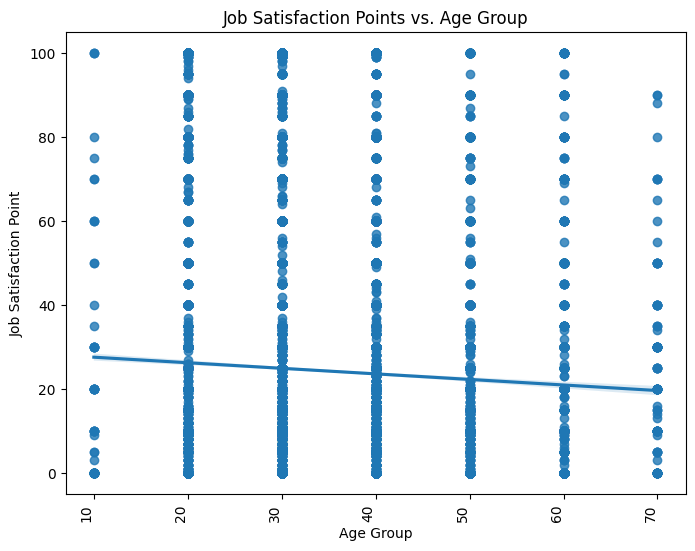

In [37]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#Ensure 'Age' is treated as a categorical variable and ordered if desired
#For example, if you want a specific order for age groups:
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True) 

#Create the categorical scatter plot (stripplot)
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.regplot(data=df, x='Age_Numeric', y='JobSatPoints_6')
plt.title('Job Satisfaction Points vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction Point')
plt.xticks(rotation=90, ha='right')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


In [25]:
#check unique value
print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique ConvertedCompYearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())

#check unique value
print('\nThere are', df['JobSatPoints_6'].nunique(), 'unique JobSatPoints_6 values in the survey:')
print(df['JobSatPoints_6'].value_counts())


There are 6113 unique ConvertedCompYearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64

There are 93 unique JobSatPoints_6 values in the survey:
JobSatPoints_6
0.0     7912
20.0    4352
10.0    3328
30.0    2482
15.0    1466
        ... 
48.0       1
44.0       1
64.0       1
54.0       1
63.0       1
Name: count, Length: 93, dtype: int64


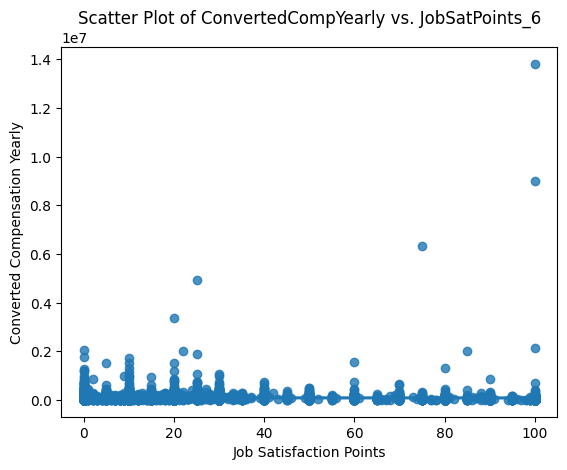

In [26]:
sns.regplot(data=df, x='JobSatPoints_6', y='ConvertedCompYearly')
plt.title('Scatter Plot of ConvertedCompYearly vs. JobSatPoints_6')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Converted Compensation Yearly')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


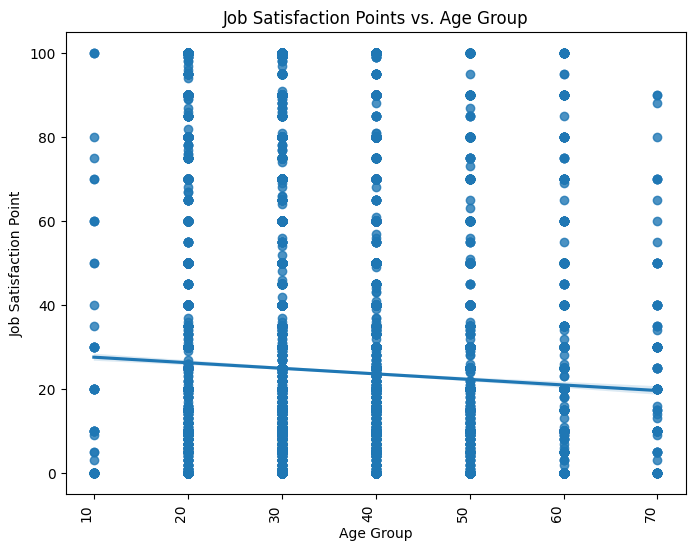

In [27]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#Create the categorical scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Age_Numeric', y='JobSatPoints_6', order=1)
plt.title('Job Satisfaction Points vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction Point')
plt.xticks(rotation=90, ha='right')
plt.show()

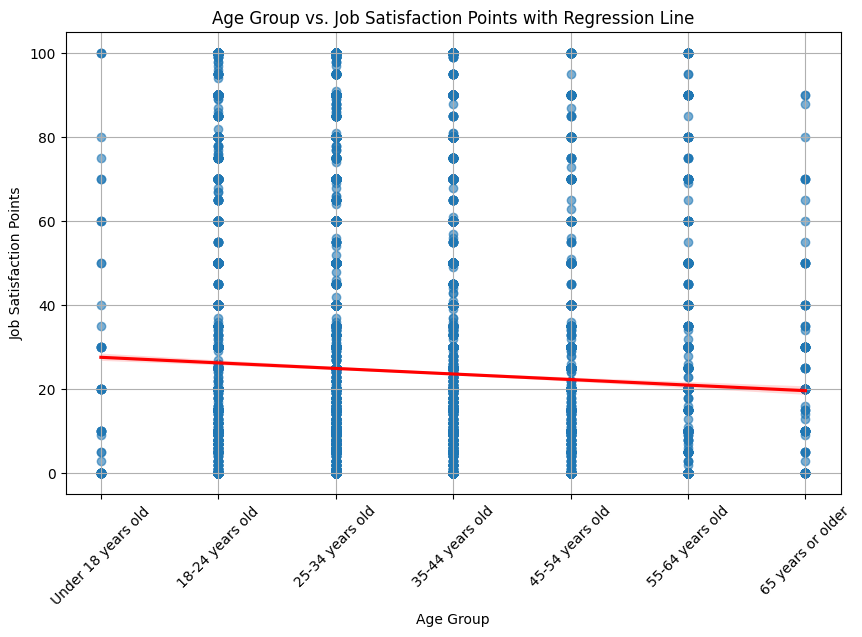

In [28]:
# 2. Create the scatter plot with a regression line using seaborn's regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age_Numeric', y='JobSatPoints_6', data=df, ci=95, 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

# Map the numerical x-axis ticks back to the original 'Age' categories for better readability
plt.xticks(ticks=df['Age_Numeric'].unique(), labels=df['Age'].unique(), rotation=45)

plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction Points')
plt.title('Age Group vs. Job Satisfaction Points with Regression Line')
plt.grid(True)
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


In [29]:
#check unique value
print('\nThere are', df['YearsCodePro'].nunique(), 'unique YearsCodePro values in the survey:')
print(df['YearsCodePro'].value_counts())

print('\nThere are', df['Age'].nunique(), 'unique Age values in the survey:')
print(df['Age'].value_counts())


There are 52 unique YearsCodePro values in the survey:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34           

In [38]:
#replace Less than 1 year with 0.5 year & More than 50 years with 55 years
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '55'})

#check after replacement
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

#convert column to numeric
# non-convertible values (like NaNs in a different format) into NaN (Not a Number).
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

#drop NaN value
df_cleaned = df.dropna(subset=['YearsCodePro_numeric'])

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2      4168
3      4093
5      3526
10     3251
4      3215
0.5    2856
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
55       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64


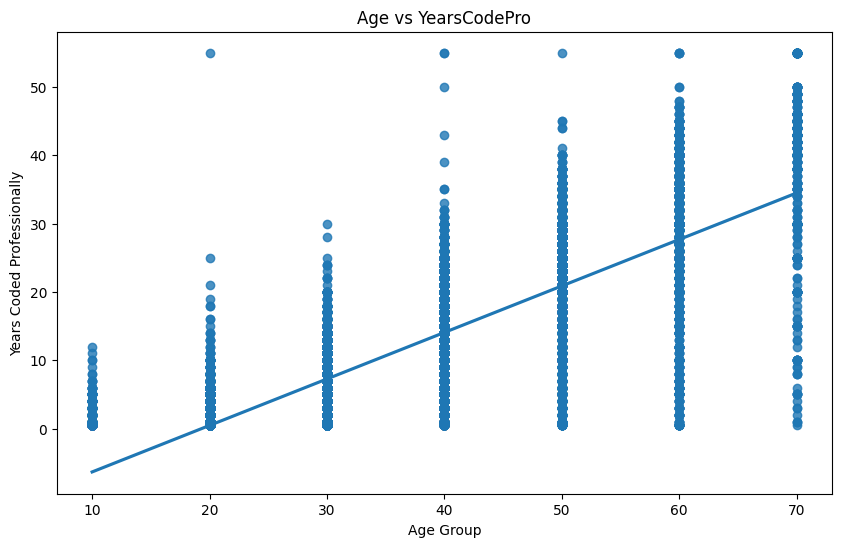

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age_Numeric', y='YearsCodePro_numeric')
plt.xlabel('Age Group')
plt.ylabel('Years Coded Professionally')
plt.title('Age vs YearsCodePro')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


ValueError: cannot convert float NaN to integer

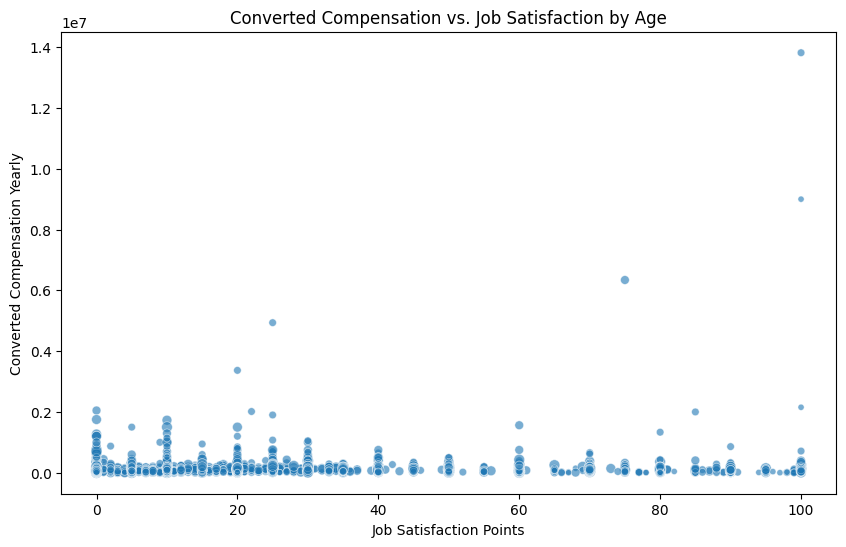

In [32]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#drop NaN value
df_cleaned = df.dropna(subset=['JobSatPoints_6', 'ConvertedCompYearly', 'Age_Numeric'])

# Ensure 'JobSat' is treated as an integer
df['JobSatPoints_6'] = df['JobSatPoints_6'].astype(int)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=df['JobSatPoints_6'],
    y=df['ConvertedCompYearly'],
    s=df['Age_Numeric'],
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Converted Compensation Yearly')
plt.title('Converted Compensation vs. Job Satisfaction by Age')

# Create a custom legend for 'Age' categories
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend_labels = [f'{key}' for key in age_mapping.keys()] # Reorder based on age_mapping
plt.legend(handles, legend_labels, title="Age Group")

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 1523 to 56942
Columns: 116 entries, ResponseId to YearsCodePro_numeric
dtypes: category(2), float64(14), int64(1), object(99)
memory usage: 183.5+ KB


In [53]:
#check unique value
print('\nThere are', df['JobSat'].nunique(), 'unique JobSat values in the survey:')
print(df['JobSat'].value_counts())

#check unique value
print('\nThere are', df['LanguageHaveWorkedWith'].nunique(), 'unique LanguageHaveWorkedWith values in the survey:')
print(df['LanguageHaveWorkedWith'].value_counts())


There are 11 unique JobSat values in the survey:
JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

There are 23864 unique LanguageHaveWorkedWith values in the survey:
LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                    1002
Python                                                                             832
HTML/CSS;JavaScript;PHP;SQL                                                        503
C#                                                                                 452
HTML/CSS;JavaScript                                                                452
                                                                                  ... 
Dart;Java;JavaScript;Kotlin;PowerShell;Python;SQL;TypeScript                         1
C#;Go;Java;JavaScript;Perl;Python;SQL;TypeScript                         

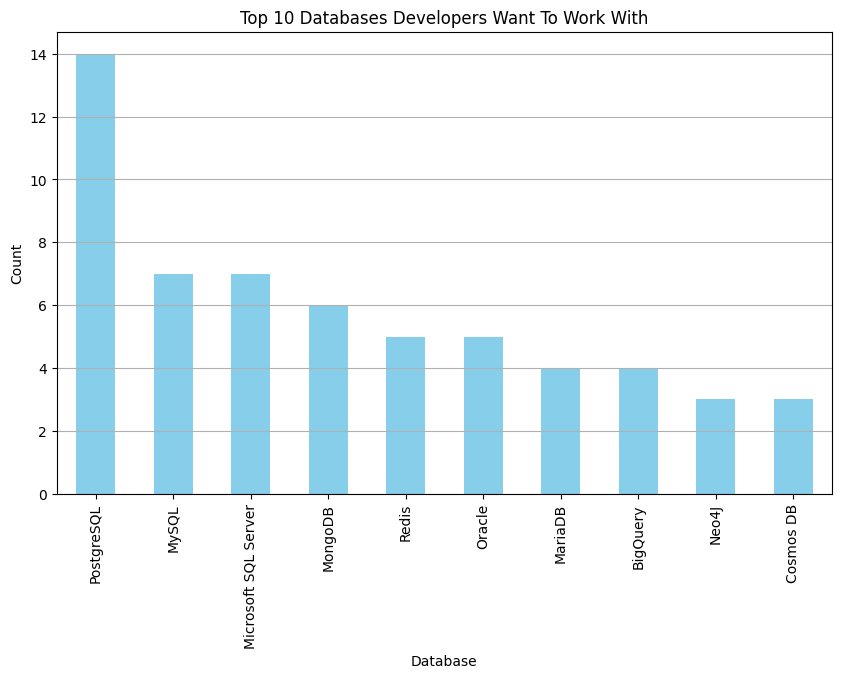

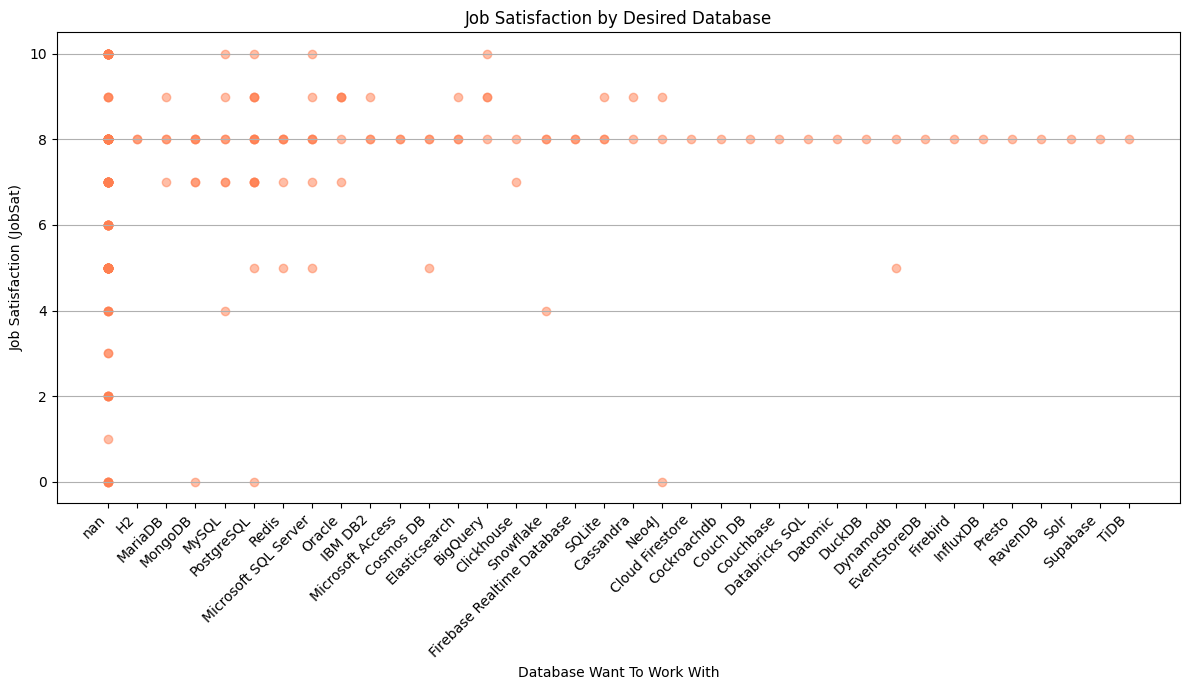

In [77]:
# Ensure 'JobSat' is treated as an integer
df['JobSat'] = df['JobSat'].astype(int)

# --- 2. Data Preparation for Counting Databases (Bar Chart) ---
# Check if the column needs splitting
if df['DatabaseWantToWorkWith'].dtype == 'object' and df['DatabaseWantToWorkWith'].str.contains(';').any():
    # Split the string entries into lists
    df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
    # Explode the DataFrame so each database gets its own row
    df_exploded = df.explode('DatabaseWantToWorkWith')
    # Strip any potential leading/trailing whitespace after splitting
    df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()
else:
    # If no splitting needed (e.g., already exploded or only single entries)
    df_exploded = df.copy()

# --- 3. Count the occurrences of each database ---
# value_counts() is the simplest way to count unique values in a Series
database_counts = df_exploded['DatabaseWantToWorkWith'].value_counts()

# --- 4. Optional: Select the top N databases for clarity ---
top_n = 10
top_databases = database_counts.head(top_n)

# --- 5. Plot the top N databases as a bar chart ---
plt.figure(figsize=(10, 6))
top_databases.plot(kind='bar', color='skyblue')
plt.title('Top 10 Databases Developers Want To Work With')
plt.xlabel('Database')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

# --- 6. Plot the scatter plot of Job Satisfaction vs. Database ---

# Note: A scatter plot requires numerical X and Y values. 
# Plotting 'DatabaseWantToWorkWith' directly on the x-axis of a scatter plot with 'JobSat' 
# does not create a standard scatter plot as intended in your code (df.plot(kind='scatter', ...)).
# The X-axis data ('DatabaseWantToWorkWith') is categorical/string data. 
# You might want a different visualization like a strip plot or a box plot for this relationship.

# To emulate a scatter plot for demonstration (often looks like a jitter plot for categorical data):
# We need to use the *exploded* dataframe to correctly match each database choice with a JobSat value.

# Using a strip plot simulation with Seaborn might be better, but sticking to Matplotlib/Pandas:
plt.figure(figsize=(12, 7))
# Create unique integer positions for each database category for the plot
category_map = {db: i for i, db in enumerate(df_exploded['DatabaseWantToWorkWith'].unique())}
x_positions = df_exploded['DatabaseWantToWorkWith'].map(category_map)

plt.scatter(x=x_positions, y=df_exploded['JobSat'], alpha=0.5, color='coral')
plt.title('Job Satisfaction by Desired Database')
plt.xlabel('Database Want To Work With')
plt.ylabel('Job Satisfaction (JobSat)')
# Set the x-axis ticks to the actual database names
plt.xticks(list(category_map.values()), list(category_map.keys()), rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout() # Adjust layout to make room for x-axis labels
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


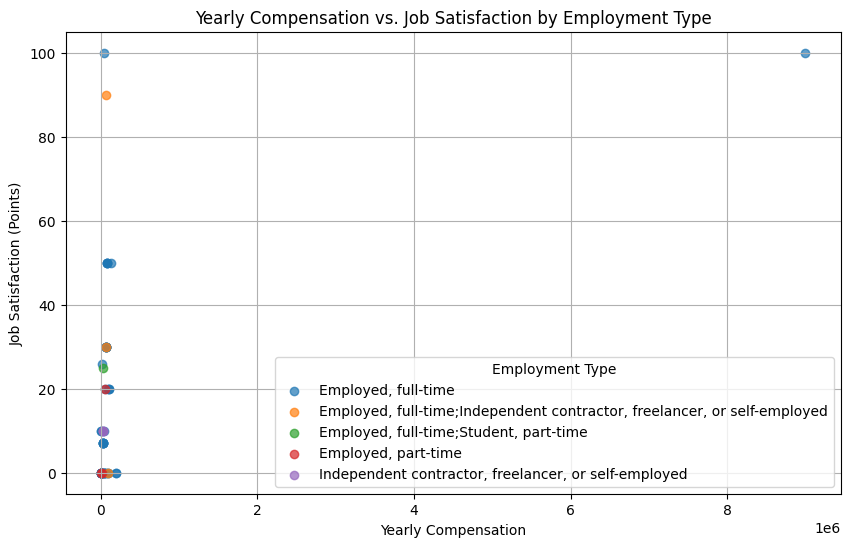

In [83]:
# Drop rows with missing values in the relevant columns for cleaner plotting
df_plot = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Group by 'Employment' and plot each group
for employment_type, group in df_plot.groupby('Employment'):
    ax.scatter(group['ConvertedCompYearly'], group['JobSatPoints_6'], label=employment_type, alpha=0.7)

ax.set_title('Yearly Compensation vs. Job Satisfaction by Employment Type')
ax.set_xlabel('Yearly Compensation')
ax.set_ylabel('Job Satisfaction (Points)')
ax.legend(title='Employment Type')
ax.grid(True)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


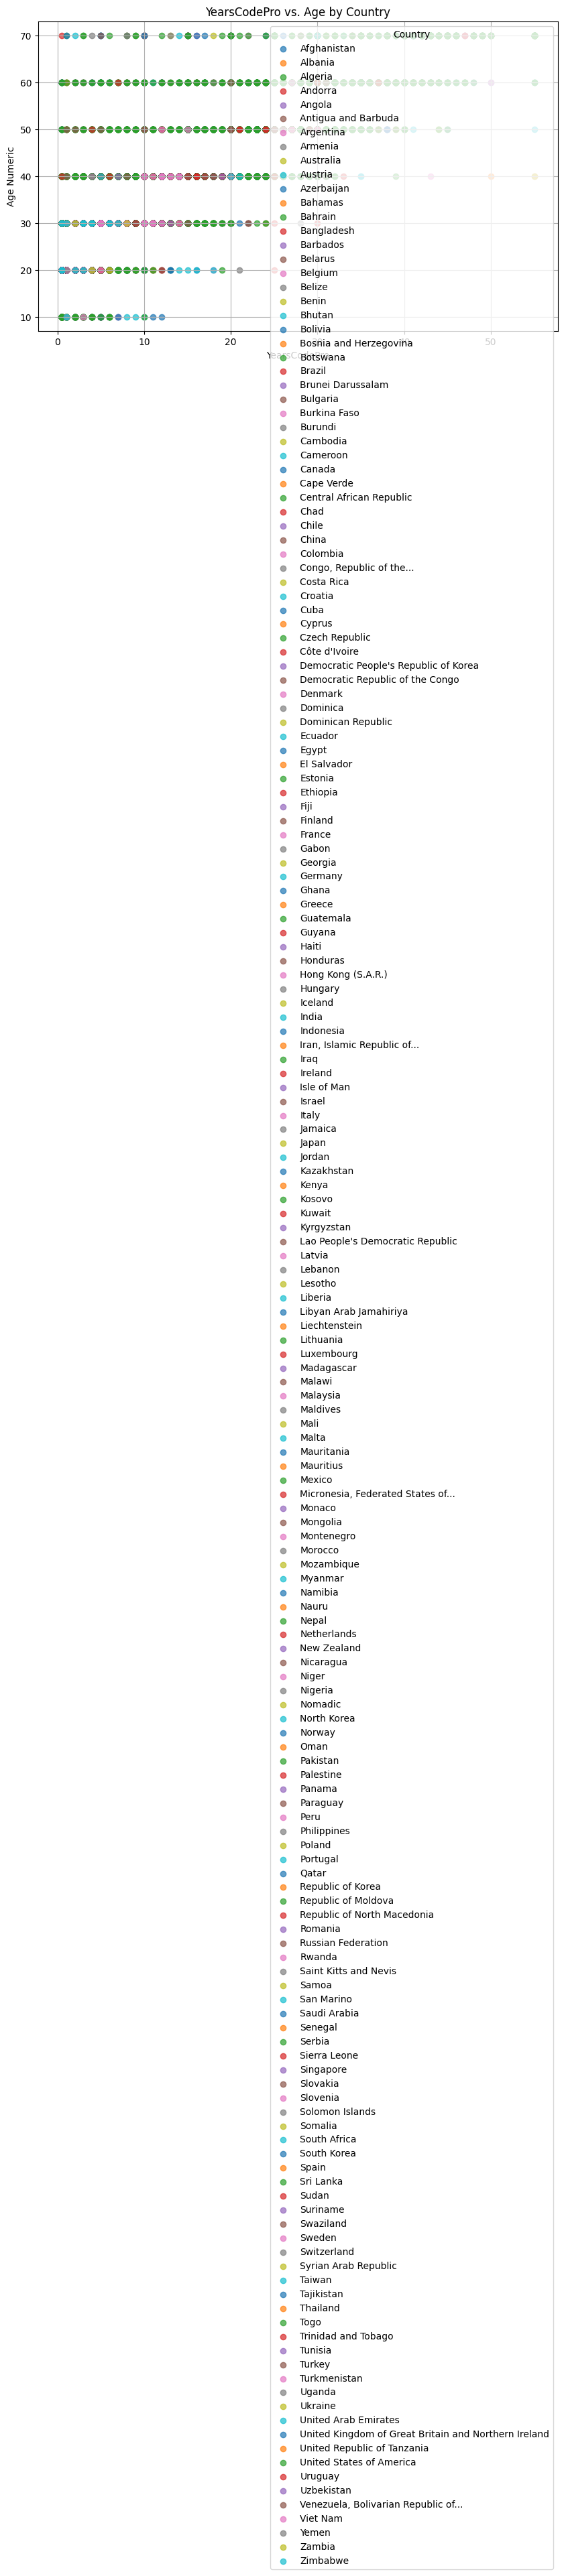

In [39]:
# Drop rows with missing values in the relevant columns for cleaner plotting
df_plot = df.dropna(subset=['YearsCodePro_numeric', 'Age_Numeric', 'Country'])

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 6))

# Group by 'Country' and plot each group
for country_type, group in df_plot.groupby('Country'):
    ax.scatter(group['YearsCodePro_numeric'], group['Age_Numeric'], label=country_type, alpha=0.7)

ax.set_title('YearsCodePro vs. Age by Country')
ax.set_xlabel('YearsCodePro')
ax.set_ylabel('Age Numeric')
ax.legend(title='Country')
ax.grid(True)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
